# Interaktionseffekte

Im folgenden werden wir einen Datensatz verwenden, um Interaktionseffekte zu untersuchen. Der Datensatz stammt aus @WARD1990AIDSKnowledgeFear und enthält Daten über Studenten in den USA. In diesem Beispiel werden wir die Beziehung zwischen Alkoholkonsum, Geschlecht und akademische Leistungen untersuchen.

Der Datensatz enthält die folgenden Variablen:

- `drink`: Alkoholkonsum
- `male`: 0/1 Variable, die das Geschlecht der Studenten angibt (1 = männlich, 0 = weiblich)
- `gpa`: Durchschnittsnoten der Studenten


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/febse/data/main/econ/drinking.csv").drop(columns=["malegpa"])
df.head()

,male,drink,gpa
0,1,5,3.20
1,0,9,3.00
2,1,29,2.85
3,0,22,NaN
4,0,19,NaN


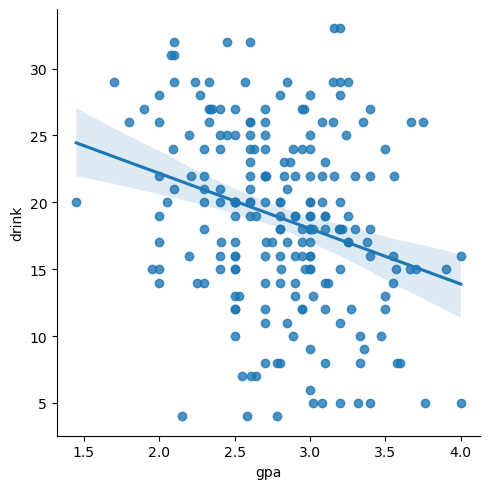

In [3]:
sns.lmplot(x="gpa", y="drink", data=df)

## Modell 1

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \epsilon
$$



$$
\widehat{\text{drink}} = \hat{\beta}_0 + \hat{\beta}_1 \text{gpa}
$$

Erläutern Sie, was $\hat{\beta}_0$ und $\hat{\beta}_1$ in diesem Modell schätzen.

drink: л. бира на месец

beta_0 ? 
beta_1 ? 

In [4]:
m1 = ols("drink ~ gpa", data=df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  drink   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     18.66
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           2.38e-05
Time:                        12:42:39   Log-Likelihood:                -715.71
No. Observations:                 218   AIC:                             1435.
Df Residuals:                     216   BIC:                             1442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4436      2.726     11.167      0.000      25.070      35.817
gpa           -4.1385      0.958     -4.320      0.000      -6.027      -2.250
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.842
Skew:                          -0.156   Prob(JB):                        0.398
Kurtosis:                       2.675   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modell 2

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \beta_2 \text{male} + \epsilon
$$

$$
\widehat{\text{drink}} = \hat{\beta}_0 + \hat{\beta}_1 \text{gpa} + \hat{\beta}_2 \text{male}
$$


Erläutern Sie, was $\hat{\beta}_0$, $\hat{\beta}_1$ und $\hat{\beta}_2$ in diesem Modell schätzen.


In [5]:
m2 = ols("drink ~ gpa + male", data=df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  drink   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     18.36
Date:                Sat, 08 Jun 2024   Prob (F-statistic):           4.34e-08
Time:                        12:42:59   Log-Likelihood:                -707.55
No. Observations:                 218   AIC:                             1421.
Df Residuals:                     215   BIC:                             1431.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.9125      2.770      9.715      0.000      21.452      32.373
gpa           -3.4529      0.940     -3.673      0.000      -5.306      -1.600
male           3.5358      0.865      4.088      0.000       1.831       5.241
==============================================================================
Omnibus:                        6.437   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.082
Skew:                          -0.270   Prob(JB):                       0.0788
Kurtosis:                       2.481   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/amarov/anaconda3/envs/econ2024/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gpa', ylabel='drink'>

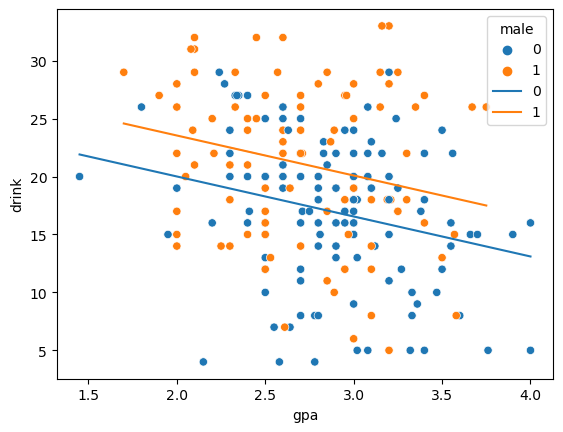

In [10]:
# Die Modellschätzungen visualisieren

m2p = m2.get_prediction().summary_frame()
m2p_with_ci = pd.concat([df, m2p], axis=1)

sns.scatterplot(x='gpa', y='drink', data=m2p_with_ci, hue="male")
sns.lineplot(x='gpa', y='mean', data=m2p_with_ci, hue="male")

## Modell 3

Schätzen Sie das folgende Modell:

$$
\text{drink} = \beta_0 + \beta_1 \text{gpa} + \beta_2 \text{male} + \beta_3 \text{gpa} \times \text{male} + \epsilon
$$

$$
\widehat{\text{drink}} = \hat{\beta}_0 + \hat{\beta}_1 \text{gpa} + \hat{\beta}_2 \text{male} + \hat{\beta}_3 \text{gpa}\times \text{male}
$$


Erläutern Sie, was $\hat{\beta}_0$, $\hat{\beta}_1$, $\hat{\beta}_2$ und $\hat{\beta}_3$ in diesem Modell schätzen.

In [6]:
m3 = ols("drink ~ gpa*male", data=df).fit()
m3.params
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  drink   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     12.35
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.76e-07
Time:                        11:26:42   Log-Likelihood:                -707.34
No. Observations:                 218   AIC:                             1423.
Df Residuals:                     214   BIC:                             1436.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.5221      3.740      7.627      0.000      21.151      35.893
gpa           -4.0112      1.282     -3.129      0.002      -6.538      -1.485
male           0.1488      5.348      0.028      0.978     -10.393      10.690
gpa:male       1.2121      1.889      0.642      0.522      -2.511       4.935
==============================================================================
Omnibus:                        6.531   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.367
Skew:                          -0.291   Prob(JB):                       0.0683
Kurtosis:                       2.498   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
m3p = m3.get_prediction().summary_frame()
m3p_with_ci = pd.concat([df, m3p], axis=1)
m3p_with_ci.head()

,male,drink,gpa,malegpa,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1,5,3.20,3.20,19.713625,0.917598,17.904938,21.522312,7.232428,32.194822
1,0,9,3.00,0.00,16.488436,0.593608,15.318369,17.658503,4.083680,28.893192
2,1,29,2.85,2.85,20.693325,0.655452,19.401357,21.985293,8.276478,33.110172
3,0,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


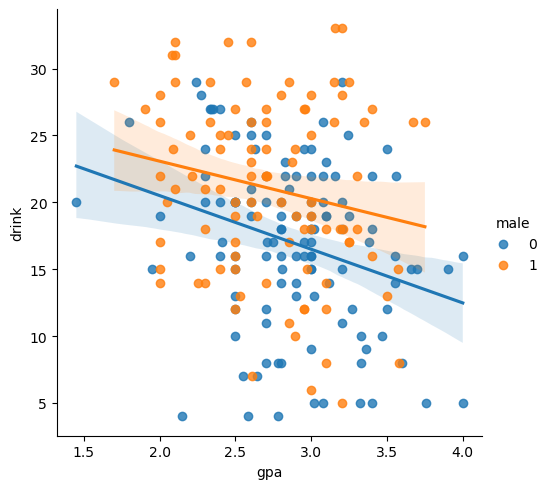

In [12]:
sns.lmplot(x='gpa', y='drink', hue="male", data=df)